In [1]:
import giraffe
import matplotlib.pyplot as plt
import notebooks
import numpy as np
import pandas as pd
import seaborn as sn

### Liver

In [2]:
expression = pd.read_csv("data/liver/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/liver/motif.csv", index_col = 0)
ppi = pd.read_csv("data/liver/ppi_matrix.csv", index_col = 0)

In [3]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True, iterations = 20).get_regulation()
R = pd.DataFrame(R, index = motif.index, columns = motif.columns)

In [4]:
# interventions = ['DROSHA', 'RBM14', 'SRSF4', 'SRSF7'] CRISPR
interventions = ['HNF1A', 'WT1', 'HIF1A', 'HSF1', 'STAT3', 'CEBPZ']

In [5]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
def intervention_score(intervention_name):
    bpath = "data/liver/raw/"
    intervention = pd.read_csv(bpath + intervention_name + '.csv')[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']]
    intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]
    score = 0
    tot = 0
    mm = 0
    mp = 0
    pm = 0
    pp = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        trans = list(translation[translation['gene_name'] == gene]['gene_id'])
        if len(trans) == 0:
            continue
        gene = trans[0][0:15]
        if gene not in expression.index:
            continue
        tot += 1
        if R.loc[gene, intervention_name] > 0:
            if intervention.iloc[i]['diff']:
                pp += 1
                score += 1
            else:
                pm += 1
        else:
            if not intervention.iloc[i]['diff']:
                mm += 1
                score += 1
            else:
                mp += 1
    sn.heatmap(data = [[pp, pm], [mp, mm]], annot = True)
    plt.show()
    print(intervention_name + " accuracy: " + str(score / tot))

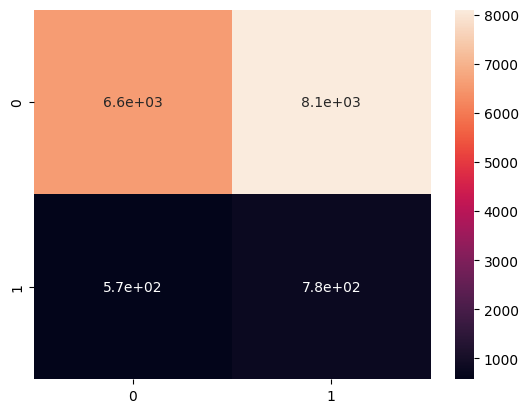

HNF1A accuracy: 0.4591308685080117


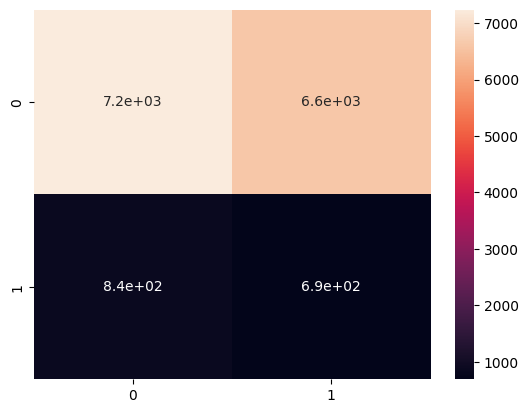

WT1 accuracy: 0.5156422764227643


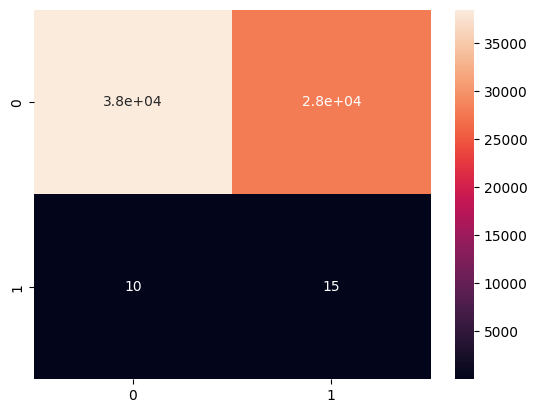

HIF1A accuracy: 0.5794074208035688


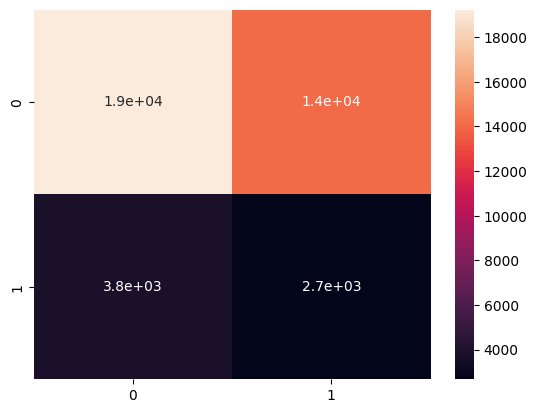

HSF1 accuracy: 0.550027625696921


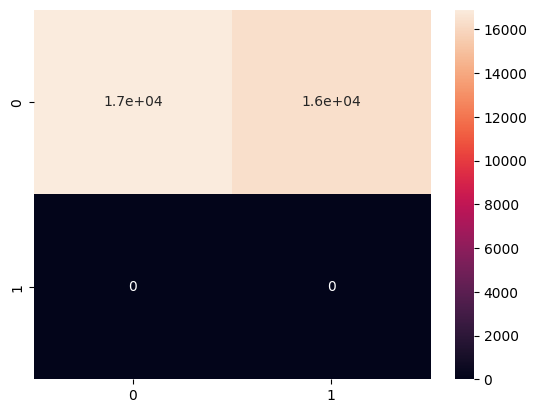

STAT3 accuracy: 0.5088347731856356


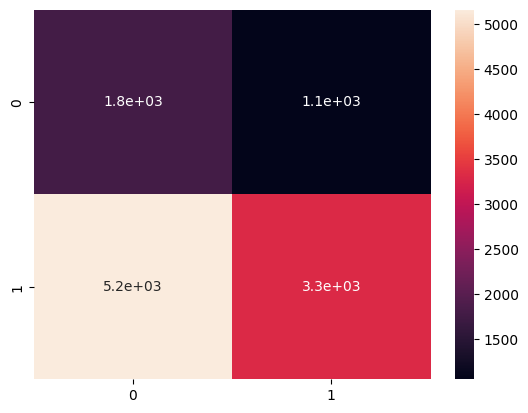

CEBPZ accuracy: 0.4504019079586609


In [6]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

### Lung

In [7]:
expression = pd.read_csv("data/L/raw/expression.csv", index_col = 0)
motif = pd.read_csv("data/L/motif.csv", index_col = 0)
ppi = pd.read_csv("data/L/ppi_matrix.csv", index_col = 0)

In [8]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True, iterations = 20).get_regulation()
R = pd.DataFrame(R, index = motif.index, columns = motif.columns)

In [9]:
interventions = ['TP53', 'STAT6', 'NFE2L2', 'YBX1', 'NKX2-1', 'GABPA', 'ETS2', 'NFYA', 'RELB', 'TFAP2C']

In [13]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
def intervention_score(intervention_name):
    bpath = "data/lung/raw/"
    intervention = pd.read_csv(bpath + intervention_name + '.csv')[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']]
    intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]
    score = 0
    tot = 0
    mm = 0
    mp = 0
    pm = 0
    pp = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        trans = list(translation[translation['gene_name'] == gene]['gene_id'])
        if len(trans) == 0:
            continue
        gene = trans[0][0:15]
        if gene not in expression.index:
            continue
        tot += 1
        if R.loc[gene, intervention_name] > 0:
            if intervention.iloc[i]['diff']:
                pp += 1
                score += 1
            else:
                pm += 1
        else:
            if not intervention.iloc[i]['diff']:
                mm += 1
                score += 1
            else:
                mp += 1
    sn.heatmap(data = [[pp, pm], [mp, mm]], annot = True)
    plt.show()
    print(intervention_name + " accuracy: " + str(score / tot))

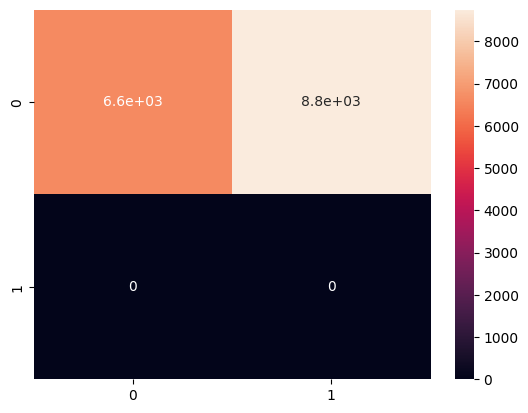

TP53 accuracy: 0.4308292682926829


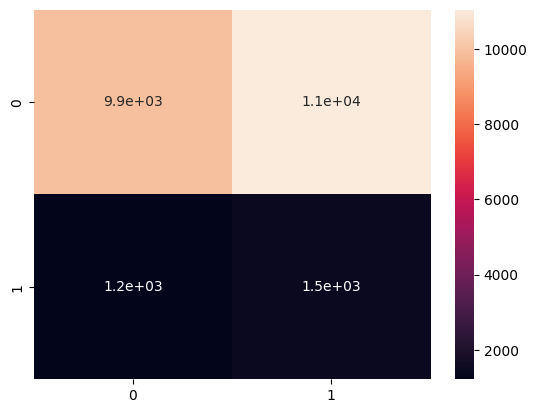

STAT6 accuracy: 0.4811791575029606


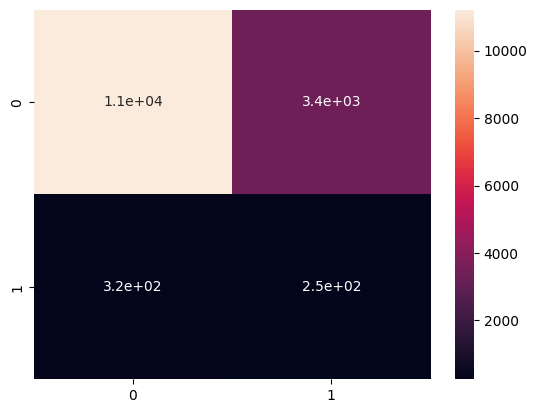

NFE2L2 accuracy: 0.7573456586332122


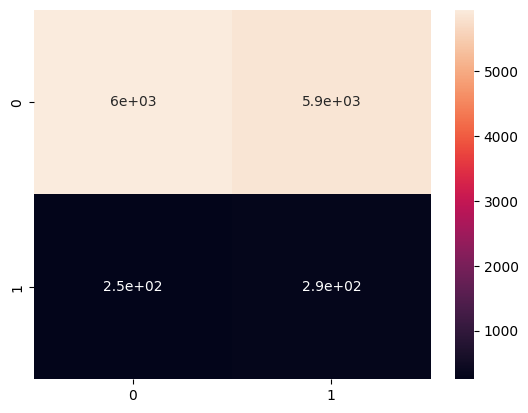

YBX1 accuracy: 0.5058327932598834


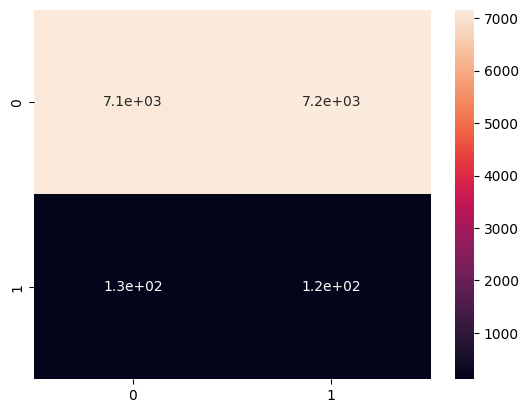

NKX2-1 accuracy: 0.4981768145854833


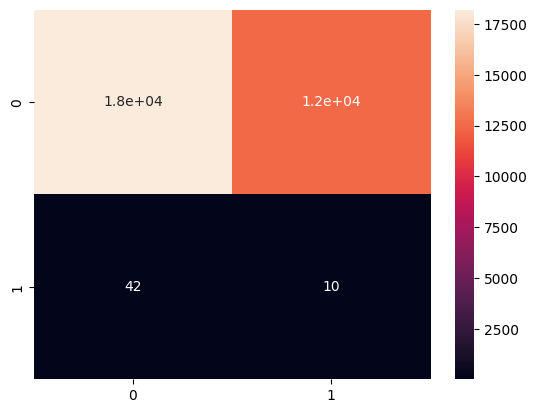

GABPA accuracy: 0.5928359957055015


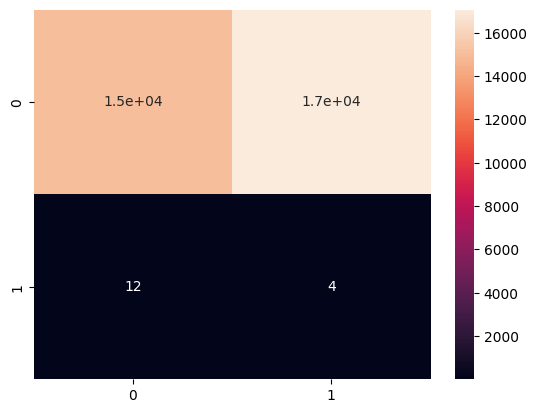

ETS2 accuracy: 0.4682109720406003


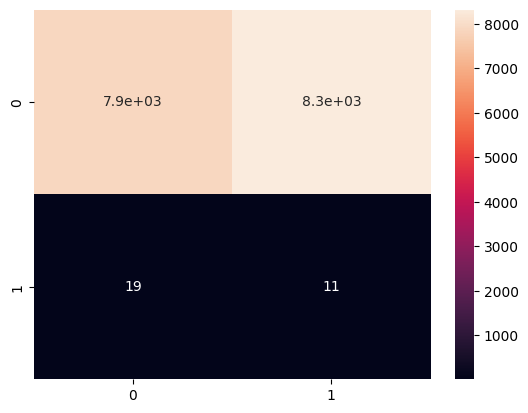

NFYA accuracy: 0.48623005360113364


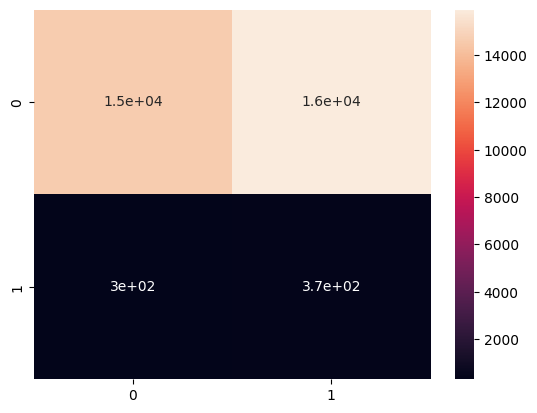

RELB accuracy: 0.48019484681451097


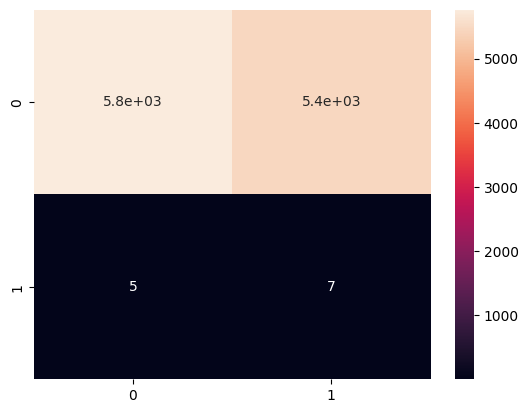

TFAP2C accuracy: 0.5140794867225094


In [15]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

### Pancreas

In [17]:
gtex = pd.read_csv("data/OG-TSG/raw/xprs_panc_gtex_snail.tsv", sep = '\t', index_col = 0)
genes = [gene[0:15] for gene in gtex.index]
gtex = pd.DataFrame(gtex.to_numpy(), index = genes, columns = gtex.columns)
motif = pd.read_csv("data/OG-TSG/motif.txt", index_col = 0)
ppi = pd.read_csv("data/OG-TSG/ppi.csv", index_col = 0)

In [18]:
giraffe_gtex = giraffe.Giraffe(gtex.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 50).get_regulation()

In [25]:
intervention = pd.read_csv("data/OG-TSG/raw/ZIC2.csv")[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']]
translate = pd.read_csv("data/OG-TSG/raw/gen_v26_mapping.csv")
intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]

In [26]:
def intervention_score(tf):
    tf_index = list(motif.columns).index(tf)
    score = 0
    tot = 0
    a = 0
    b = 0
    aa = 0
    bb = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        if intervention['Target Gene'][i] not in set(translate['gene_name']):
            continue
        translation = translate[translate['gene_name'] == intervention['Target Gene'][i]]['gene_id'].values[0][0:15]
        if translation not in gtex.index:
            continue
        tot += 1
        if giraffe_gtex[list(gtex.index).index(translation), tf_index] > 0:
            a += 1
            if intervention.iloc[i]['diff']:
                aa += 1
                score += 1
        else:
            b += 1
            if not intervention.iloc[i]['diff']:
                bb += 1
                score += 1
    return score / tot

In [27]:
interventions = ['HOXB7', 'FOXO3', 'ZIC2']
for j in interventions:
    print(intervention_score(j))

0.6651471838059183
0.6840763346982925
0.6863169280692266
